# Datatype Conversion
The default datatype of this object is unsigned integer (8 bits).
For most arithmetic operations like multiplication and division, it's better to convert the array type to floating point with each pixel having 16,32 or 64 bits of data. This prevents overflowing.

In [3]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Read the image
image=cv2.imread("boy.jpg")

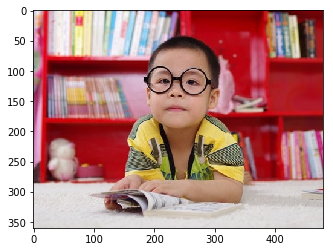

In [7]:
scalingFactor=1/255.0

# Convert uint to float
image=np.float32(image)
# Scale the values so that they lie between [0,1]
image=image*scalingFactor
plt.imshow(image[:,:,::-1]);

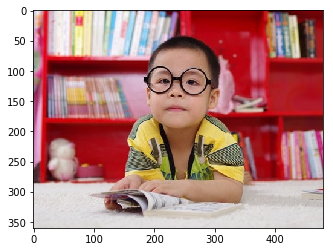

In [8]:
# Convert back to unsigned int
image=image*(1.0/scalingFactor)
image=np.uint8(image)
plt.imshow(image[:,:,::-1]);

# Contrast Enhancement

Intensity Scaling: A scale factor (  α  ) is multiplied with intensity values of all the pixels.

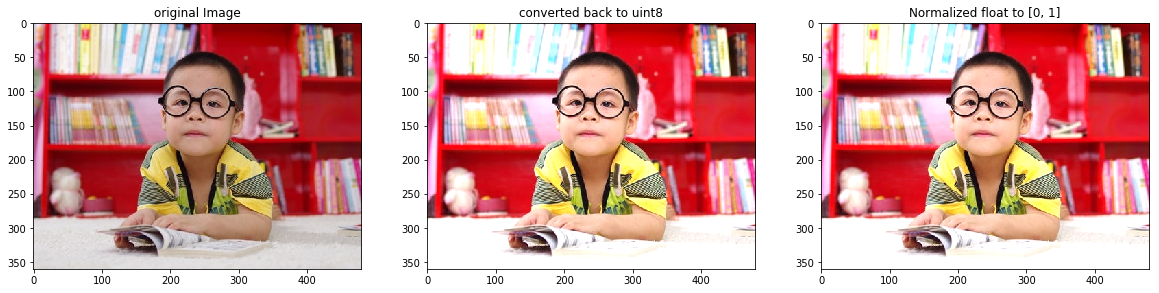

In [9]:
contrastPercentage=30

# Clip the values [0,255] to keep the values in range and change it back to uint8 for display
contrastImage=image*(1+contrastPercentage/100)
clippedContrastImage=np.clip(contrastImage,0,255)
contrastHighClippedUint8=np.uint8(clippedContrastImage)

# Covert the range to [0,1] and keep it in the float format
contrastHighNormalized=(image*(1+contrastPercentage/100))/255
contrastHighNormalized01Clipped=np.clip(contrastHighNormalized,0,1)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(contrastHighClippedUint8[...,::-1]);plt.title("converted back to uint8");
plt.subplot(133);plt.imshow(contrastHighNormalized01Clipped[...,::-1]);plt.title("Normalized float to [0, 1]");

# Brightness Enhancement

Adding a value to every pixel

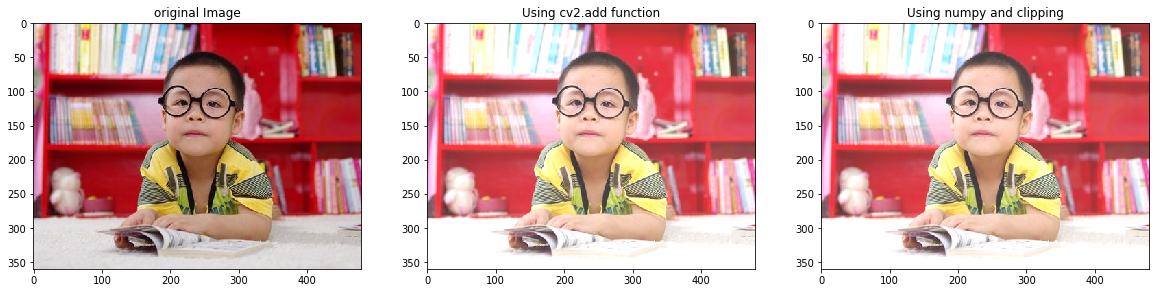

In [10]:
brightnessOffset=50

# Add the offset to increase brightness
# One way is to use cv.add function. For this, we don't have to chnage the image dtype. 
#The function will take care of the overflow and underflow
brightHighOpenCV=cv2.add(image,np.ones(image.shape,dtype='uint8')*brightnessOffset)

# Second way to change the type to int32 to take care of overflow
brightHighInt32=np.int32(image)+brightnessOffset
# Clip the higher values (higher than 255)
brightHighInt32Clipped=np.clip(brightHighInt32,0,255)

# Display
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(brightHighOpenCV[...,::-1]);plt.title("Using cv2.add function");
plt.subplot(133);plt.imshow(brightHighInt32Clipped[...,::-1]);plt.title("Using numpy and clipping");

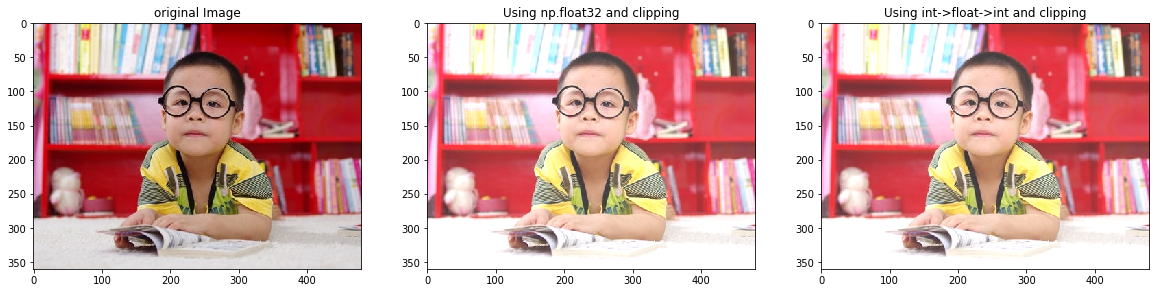

In [11]:
# Another way is to convert to float and normalize it and clip to make pixels in range [0,1]
brightHighFloat32=np.float32(image)+brightnessOffset
brightHighFloat32NormalizedClipped=np.clip(brightHighFloat32/255,0,1)

# Convert it back to uint8
brightHighFloat32ClippedUint8=np.uint8(brightHighFloat32NormalizedClipped*255)

# Display
# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(132);plt.imshow(brightHighFloat32NormalizedClipped[...,::-1]);plt.title("Using np.float32 and clipping");
plt.subplot(133);plt.imshow(brightHighFloat32ClippedUint8[...,::-1]);plt.title("Using int->float->int and clipping");